<a id="cuarto"></a>
## 4. Entendimiento de imágenes de personas

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante difícil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.


<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) con la tarea de predecir la **edad** (*target value*) de la persona en la imagen. Los datos con corresponden a 3640 imágenes de Flickr de rostros de personas, pero para simplificar el manejo y cómputo, se trabajará con representaciones de características extraídas (descriptores). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:
```python
import scipy.io as sio
sio.loadmat("file.mat")
```

Para descripción sobre las columnas y metadatos del archivo descargado favor dirigirse al archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```
En el apartado "*MATLAB DATA*".



> a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [1]:
import scipy.io as sio
mat_train = sio.loadmat("./eventrain.mat")
mat_test = sio.loadmat("./eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]

In [2]:
print("se tienen ", len(data_train)," columnas y ", len(data_train[1]), " filas  para el conjunto de entrenamiento")
print("se tienen ", len(data_test)," columnas y ", len(data_test[1]), " filas  para el conjunto de prueba")

se tienen  11  columnas y  3500  filas  para el conjunto de entrenamiento
se tienen  11  columnas y  1050  filas  para el conjunto de prueba


Esta interpretación surge del hecho de que la información se almacena en un arreglo de arreglos, por tanto se interpreta cada arreglo como una columna distinta de otra, con lo que se ilustrará con un ejemplo:

In [3]:
print(data_train[1])

[[51]
 [28]
 [28]
 ...
 [ 1]
 [ 1]
 [ 1]]


note tambien que cada dato por si solo también es un arreglo.

In [4]:
mat_test

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Nov 18 15:31:22 2008',
 '__version__': '1.0',
 '__globals__': [],
 'tecoll': array([[(array([[87.        , 35.        ,  1.        , ...,  1.09343236,
          1.        ,  5.        ],
        [32.        , 60.        ,  1.        , ...,  0.97426295,
          1.        ,  5.        ],
        [41.        , 65.        ,  2.        , ...,  0.94143991,
          1.        ,  5.        ],
        ...,
        [34.        , 59.        ,  1.        , ...,  1.        ,
          1.        ,  6.        ],
        [65.        , 58.        ,  1.        , ...,  1.11063618,
          2.        ,  1.        ],
        [33.        , 11.        ,  1.        , ...,  1.        ,
          2.        ,  2.        ]]), array([[28],
        [28],
        [28],
        ...,
        [10],
        [10],
        [10]], dtype=uint8), array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=uint8), a

- genFeat: contiene el "nombre" dela imagen que contiene al rostro
- ageClass: contiene la edad del rostro
- genClass: contiene genero
- ffcoef: es una proyeccion del rostro a un espacio de fisherman. Util para medicion de similitud facial. 
- faceGist: Sin descripción
- faceimg: sin descripción
- genderGuessNN: sin descripcion
- ageGuess: sin descripcion
- name: nombre de la imagen
- facePosSize: posición del rostro
- Origin: sin descripcion

> b) Elija cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo de aprendizaje a utilizar, recuerde que puede utilizar una combinación de éstos si lo desea. Además extraiga las salidas/*output* del problema, en este caso, como ya se comentó, la edad. Describa los datos utilizados y la cantidad de datos por rango de edad.

In [5]:
def extractor(lista):
    lst=[]
    for i in range(len(lista)):
        lst.append(lista[i][0])
    lista = lst
    return lista;

In [6]:
import pandas as pd


En primer lugar se generarán las tablas con las que se trabajarán. Se considerarán las primeras 4 variables, debido a que son las que poseen información más clara en la documentación de la información.

In [7]:
import pandas as pd

##############################################
#                 Training Data              #
############################################## 
df_train = pd.DataFrame()#Dataframe de entrenamiento
genFeat = extractor(data_train[0])#it can be used as representation: contextual features
df_train['genFeat'] = pd.Series(genFeat)
ageClass = extractor(data_train[1])#target
df_train['ageClass'] = pd.Series(ageClass)
genClass = extractor(data_train[2])
df_train['genClass'] = pd.Series(genClass)
ffcoef = extractor(data_train[3])#it can be used as representation: fisherface space
df_train['ffcoef'] = pd.Series(ffcoef)
faceGist = extractor(data_train[4])#it can be used as representation
df_train['faceGist'] = pd.Series(faceGist)
faceimg = extractor(data_train[5])
genderGuessNN = extractor(data_train[6])
ageGuess = extractor(data_train[7])
name = extractor(data_train[8])
facePosSize = extractor(data_train[9])
Origin = extractor(data_train[10])


In [8]:
df_train.head(2)

,genFeat,ageClass,genClass,ffcoef,faceGist
0,42.0,51,2,0.043865,5.919031
1,60.0,28,2,0.016909,5.457365


In [9]:
##############################################
#                  Test  Data                #
############################################## 
df_test = pd.DataFrame()#Dataframe de entrenamiento
genFeat = extractor(data_test[0])#it can be used as representation: contextual features
df_test['genFeat'] = pd.Series(genFeat)
ageClass = extractor(data_test[1])#target
df_test['ageClass'] = pd.Series(ageClass)
genClass = extractor(data_test[2])
df_test['genClass'] = pd.Series(genClass)
ffcoef = extractor(data_test[3])#it can be used as representation: fisherface space
df_test['ffcoef'] = pd.Series(ffcoef)
faceGist = extractor(data_test[4])#it can be used as representation
df_test['faceGist'] = pd.Series(faceGist)
faceimg = extractor(data_test[5])
genderGuessNN = extractor(data_test[6])
ageGuess = extractor(data_test[7])
name = extractor(data_test[8])
facePosSize = extractor(data_test[9])
Origin = extractor(data_test[10])

In [10]:
df_test.head(3)

,genFeat,ageClass,genClass,ffcoef,faceGist
0,87.0,28,1,-0.079479,16.453856
1,32.0,28,1,-0.089160,53.821861
2,41.0,28,1,-0.076106,6.814312


Ahora generaremos el conjunto de entrenamiento y de pruebas.

In [11]:
Y_train =df_train["ageClass"].values
df_train.drop("ageClass",axis=1,inplace=True)
X_train = df_train.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 4 columns):
genFeat     3500 non-null float64
genClass    3500 non-null int64
ffcoef      3500 non-null float64
faceGist    3500 non-null float64
dtypes: float64(3), int64(1)
memory usage: 109.5 KB


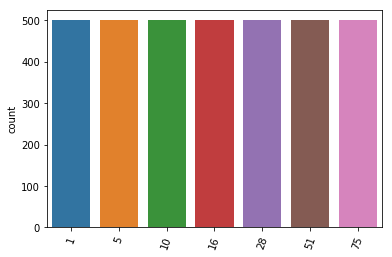

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=Y_train)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 20
plt.xticks(rotation=70)
df_train.info()

In [13]:
Y_test =df_test["ageClass"].values
df_test.drop("ageClass",axis=1,inplace=True)
X_test = df_test.values

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

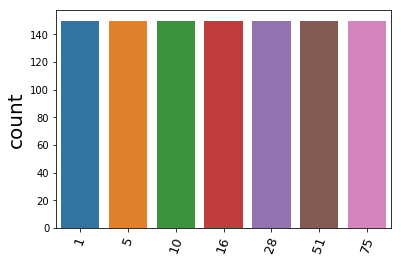

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=Y_test)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 20
plt.xticks(rotation=70)

> c) Defina y entrene modelos de aprendizaje para la inferencia de la edad de la persona a través de la representación escogida, *se espera que experimente con distintas configuraciones, modelos e hiper-parámetros* . Intente llegar a un *MSE* menor a 100 sobre la edad de las personas en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.


*Nota: Puede notar que la cantidad de edades presentes en el problema son pocas (1,  5, 10, 16, 28, 51 o 75 años), por lo que puede tratar al problema así como de regresión o clasificación (considerando cada edad como una clase)*


#### Ayuda:

> Para problemas de clasificación de múltiples clases, la red neuronal de *keras* necesita una represnetacion *one hot vector* similar a lo comentado en la sección 2, por lo que será necesario transformar/codificar las edades a etiquetas categóricas, donde cada columna del vector representará una categoría. Por ejemplo, si existen tres categorías (perro, gato, ratón), la categoría perro puede ser codificada como [1,0,0], y la categoría ratón puede ser codificada como [0,0,1]. Para ésto la librería *keras* nos ayuda:

<div class="alert alert-warning"> Recuerde que si trabaja el problema como clasificación deberá invertir la transformación de codificación de las edades a clases, para así poder evaluar el MSE </div>

```python
import keras
y_onehot = keras.utils.to_categorical(y_train,num_classes=edades_distintas)
```

*Recuerde que:* Si encuentra que la métrica evaluadora le perjudica puede acudir a otras para entender el qué está pasando con su modelo.


In [15]:
import keras
#Y_train= keras.utils.to_categorical(Y_train,num_classes=7)

C:\Users\kzep\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
model = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=5)
model.fit(X_train,Y_train)
print(mean_squared_error(model.predict(X_test),Y_test))

642.8105815911581


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X_train,Y_train)
print(mean_squared_error(model.predict(X_test),Y_test))

1087.624761904762


In [31]:
from sklearn.svm import SVR
model = SVR(gamma=6, C=0.7, epsilon=0.4)
model.fit(X_train,Y_train)
print(mean_squared_error(model.predict(X_test),Y_test))



748.4644561101778
